# Displaying SEN2 data from a Demo PNG

In [1]:
import rasterio
from rasterio.plot import show
from pathlib import Path

# Test should run from root
import os

os.chdir("..")

In [2]:
from omegaconf import OmegaConf
from metaearth.api import extract_assets
from metaearth.config import ConfigSchema

cfg = OmegaConf.load("config/sen2.yaml")
cfg_schema = OmegaConf.structured(ConfigSchema)
cfg = OmegaConf.merge(cfg_schema, cfg)


# Constrain the test to only pull one item and one band
for pvdr in cfg.providers:
    for coll in pvdr.collections:
        coll.max_items = 1
        coll.assets = ["preview"]

success = extract_assets(cfg)

print("Successfully extracted assets." if success else "Asset extraction failed.")

12:39:51 INFO - Extraction details for collection sentinel-2-l2a:
		provider=<Microsoft Planetary Computer (MPC)> 
		timerange=<2022-01-01/2022-01-02>,
		aoi_file=<config/aoi/demo.json>, 
		output_dir=<data>,
		assets=<['preview']>
12:39:52 INFO - 
Microsoft Planetary Computer (MPC) returned 1 items for sentinel-2-l2a for datetime 2022-01-01/2022-01-02

12:39:52 INFO - 1 assets did not specify file size, will query size directly with http get request (this may take a few moments)
system.query_asset_sizes=False can be used to disable this behavior


  0%|          | 0/1 [00:00<?, ?it/s]

12:39:54 INFO - 1 assets have unknown file size
12:39:54 INFO - 1 assets to extract from 1 items
12:39:54 INFO - Asset types: 
key=preview; description="Thumbnail"
12:39:54 INFO - Total asset size: 0 MB
12:39:54 INFO - Number of assets with unknown size: 1
12:39:54 INFO - Starting data extraction
12:39:54 INFO - Extracting 1 assets (0MB)...
Assets:   0%|                                             | 0/1 [00:00<?, ?it/s]2022-09-05 12:39:56.417 | DEBUG    | metaearth.util.stac:download:47 - Downloading https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/11/S/LC/2022/01/01/S2A_MSIL2A_20220101T184801_N0300_R070_T11SLC_20220102T161247.SAFE/GRANULE/L2A_T11SLC_A034101_20220101T185006/QI_DATA/T11SLC_20220101T184801_PVI.tif?st=2022-09-04T19%3A39%3A56Z&se=2022-09-05T20%3A24%3A56Z&sp=rl&sv=2021-06-08&sr=c&skoid=c85c15d6-d1ae-42d4-af60-e2ca0f81359b&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2022-09-05T19%3A12%3A27Z&ske=2022-09-12T19%3A12%3A27Z&sks=b&skv=2021-06-08&sig=7UTNTF5x6sDgACCtUJP

Successfully extracted 1 assets. 0 failed.


In [3]:
# Find the first GeoTIFF file and load it
# We avoid hardcoding the path here in case the API changes down the road

fpath = Path(cfg["default_collection"]["outdir"])
collection_for_gt = "sentinel-2-l2a"
gt_files = list((fpath / collection_for_gt).glob("**/*.tif"))

assert (
    len(gt_files) <= 1
), "There were too many files pulled, `max_items` failed to constrain."

gt_file_fpath = gt_files[0]

data = rasterio.open(gt_file_fpath)

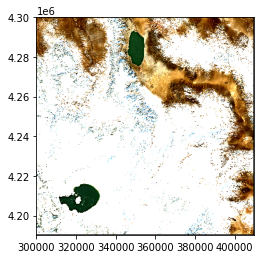

<AxesSubplot:>

In [4]:
show(data)